In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:

df_1 = pd.read_csv("/Users/branly/Desktop/Python Project/FP.csv")


df_1['OrderDate'] = pd.to_datetime(df_1['OrderDate'])


start_date = '2015-01-01'
end_date = '2017-09-30'  

df_filtered = df_1[(df_1['OrderDate'] >= start_date) & (df_1['OrderDate'] <= end_date)]


aggregate = {
    'Sales': 'last',
    'Order_Id': 'last',
    'Customer_Segment': 'last',
    'OrderDate': 'last',
    'Category_Name':'last',
    'Market':'last'
}

df = df_filtered.groupby('column1').agg(aggregate).reset_index()
df.head()



,column1,Sales,Order_Id,Customer_Segment,OrderDate,Category_Name,Market
0,48,119.980003,28744,Home Office,2016-02-24 13:57:00,Fishing,Pacific Asia
1,49,79.980003,45461,Home Office,2016-10-25 14:39:00,Women's Apparel,Pacific Asia
2,50,100.000000,31115,Home Office,2016-03-30 04:37:00,Women's Apparel,Pacific Asia
3,51,79.980003,45766,Home Office,2016-10-30 01:31:00,Camping & Hiking,Pacific Asia
4,52,100.000000,47752,Home Office,2016-11-28 01:18:00,Women's Apparel,Pacific Asia


In [4]:

df_home_office = df[df['Customer_Segment'] == 'Home Office'].copy()
df_consumer = df[df['Customer_Segment'] == 'Consumer'].copy()
df_corporate = df[df['Customer_Segment'] == 'Corporate'].copy()

In [5]:
df_home_office.head()

,column1,Sales,Order_Id,Customer_Segment,OrderDate,Category_Name,Market
0,48,119.980003,28744,Home Office,2016-02-24 13:57:00,Fishing,Pacific Asia
1,49,79.980003,45461,Home Office,2016-10-25 14:39:00,Women's Apparel,Pacific Asia
2,50,100.000000,31115,Home Office,2016-03-30 04:37:00,Women's Apparel,Pacific Asia
3,51,79.980003,45766,Home Office,2016-10-30 01:31:00,Camping & Hiking,Pacific Asia
4,52,100.000000,47752,Home Office,2016-11-28 01:18:00,Women's Apparel,Pacific Asia


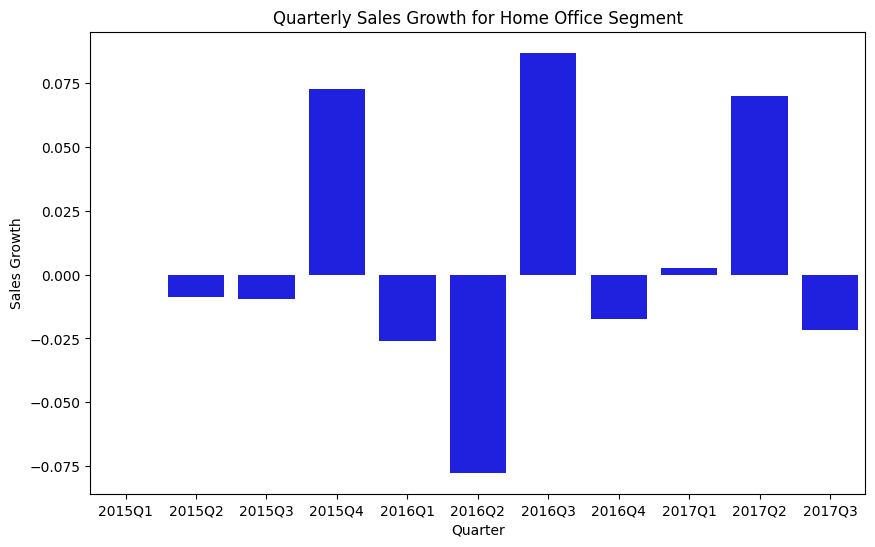

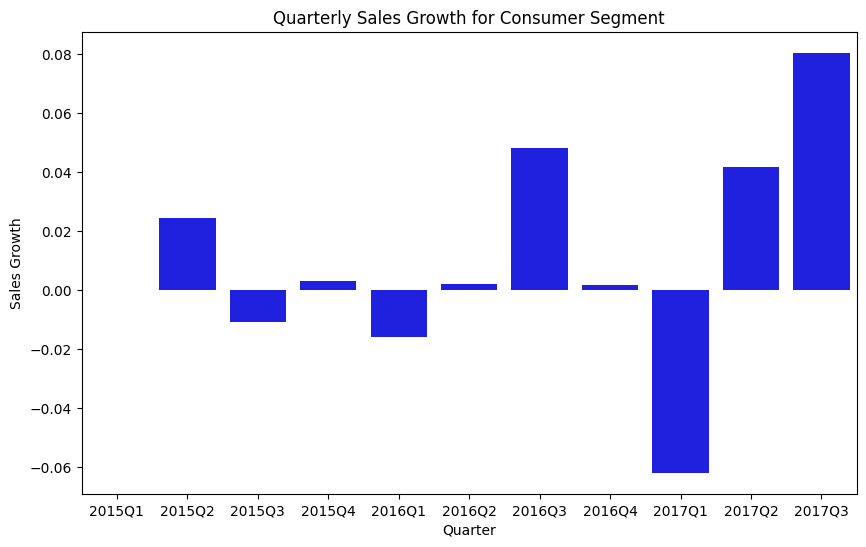

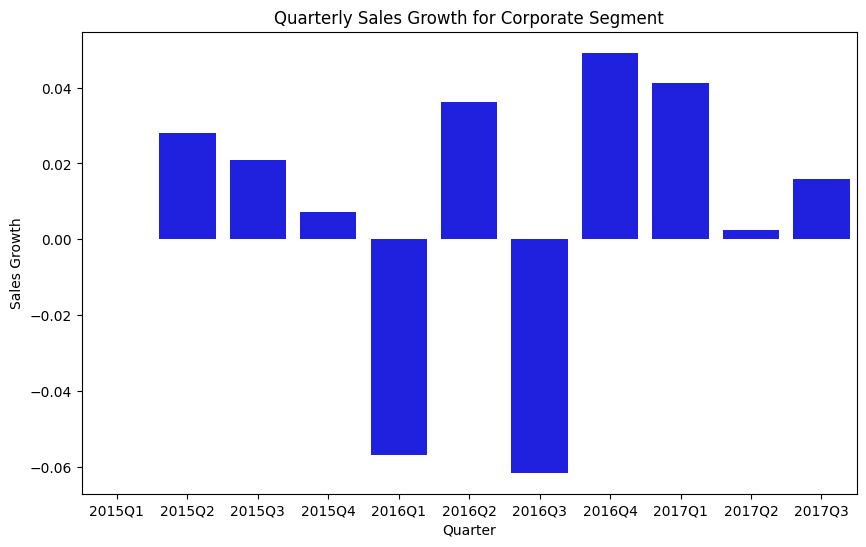

In [6]:

df = df.sort_values(by='OrderDate')


df['Quarter'] = df['OrderDate'].dt.to_period('Q')
quarterly_sales = df.groupby(['Quarter', 'Customer_Segment'])['Sales'].sum().reset_index()


quarterly_sales['Sales_Growth'] = quarterly_sales.groupby('Customer_Segment')['Sales'].pct_change()


customer_segments = ['Home Office', 'Consumer', 'Corporate']

for segment in customer_segments:
    segment_data = quarterly_sales[quarterly_sales['Customer_Segment'] == segment]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Quarter', y='Sales_Growth', data=segment_data, color='blue')
    plt.title(f'Quarterly Sales Growth for {segment} Segment')
    plt.xlabel('Quarter')
    plt.ylabel('Sales Growth')
    plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/3975616455.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data = df_consumer[(df_consumer['OrderDate'] >= '2015-04-01') & (df['OrderDate'] < '2015-07-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/3975616455.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_2017_data = df_consumer[(df_consumer['OrderDate'] >= '2017-04-01') & (df['OrderDate'] < '2017-07-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/3975616455.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3_data = df_consumer[(df_consumer['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]


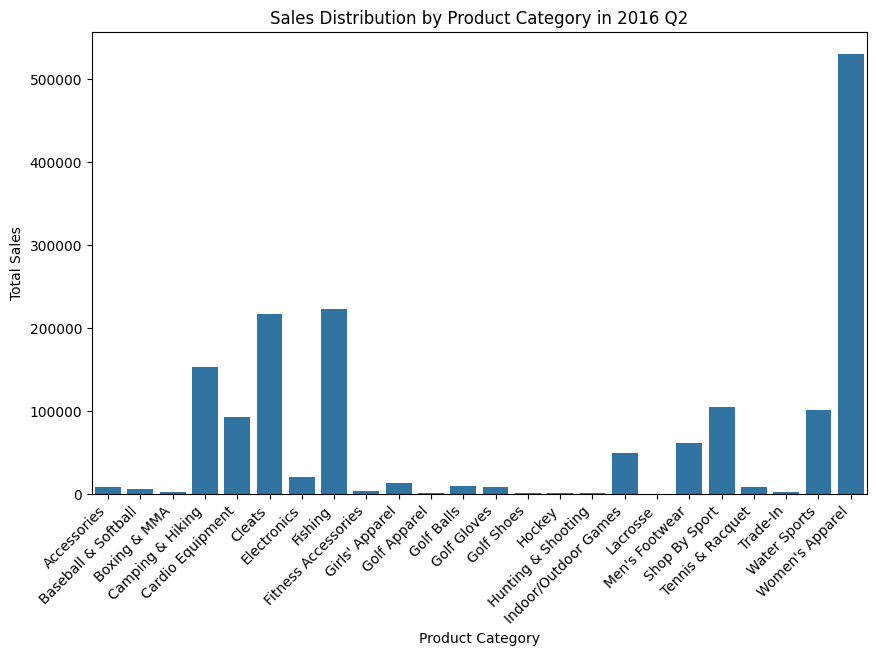

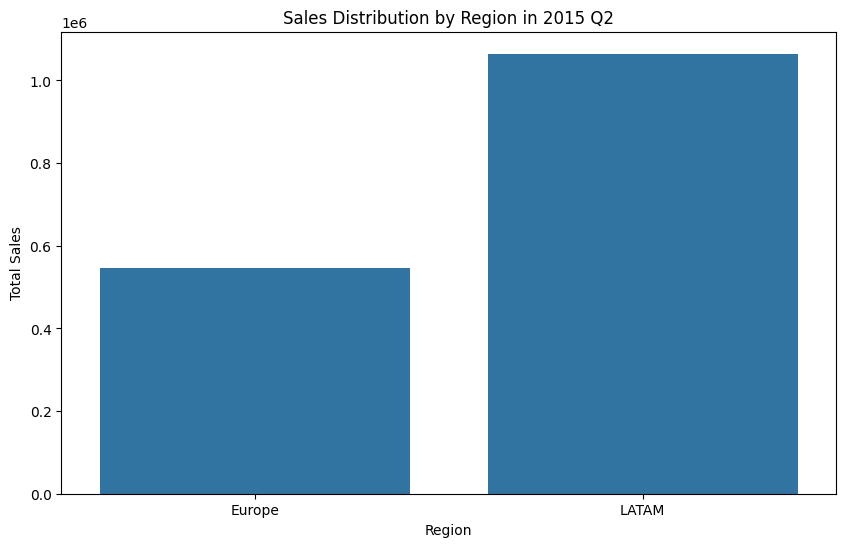

In [7]:
q2_data = df_consumer[(df_consumer['OrderDate'] >= '2015-04-01') & (df['OrderDate'] < '2015-07-01')]
q2_2017_data = df_consumer[(df_consumer['OrderDate'] >= '2017-04-01') & (df['OrderDate'] < '2017-07-01')]
q3_data = df_consumer[(df_consumer['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]

sales_by_product = q2_data.groupby('Category_Name')['Sales'].sum().reset_index()
sales_by_region = q2_data.groupby('Market')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category_Name', y='Sales', data=sales_by_product)
plt.title('Sales Distribution by Product Category in 2016 Q2')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') 
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Market', y='Sales', data=sales_by_region)
plt.title('Sales Distribution by Region in 2015 Q2')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/3803448758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['Quarter'] = segment_data['Quarter'].astype(str)
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/3803448758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['Quarter'] = segment_data['Quarter'].astype(str)
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/3803448758.py:15: SettingWithCopyWarning: 
A value is trying to b

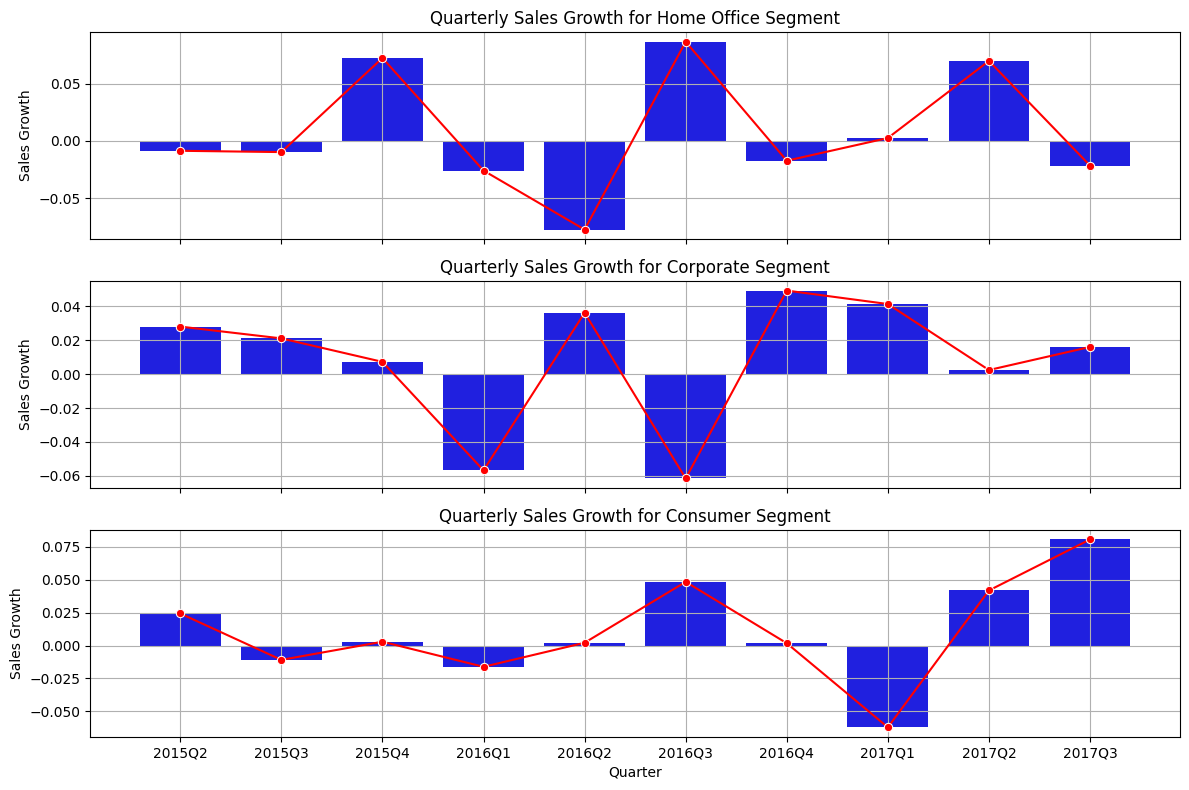

In [8]:

df = df.sort_values(by='OrderDate')

df['Quarter'] = df['OrderDate'].dt.to_period('Q')

quarterly_sales = df.groupby(['Quarter', 'Customer_Segment'])['Sales'].sum().reset_index()

quarterly_sales['Sales_Growth'] = quarterly_sales.groupby('Customer_Segment')['Sales'].pct_change()

customer_segments = ['Home Office', 'Corporate', 'Consumer']

fig, axes = plt.subplots(nrows=len(customer_segments), ncols=1, figsize=(12, 8), sharex=True)

for i, segment in enumerate(customer_segments):
    segment_data = quarterly_sales[quarterly_sales['Customer_Segment'] == segment]
    segment_data['Quarter'] = segment_data['Quarter'].astype(str)
    
    sns.barplot(x='Quarter', y='Sales_Growth', data=segment_data, color='blue', ax=axes[i])
   
    sns.lineplot(x='Quarter', y='Sales_Growth', data=segment_data, color='red', marker='o', ax=axes[i])
   
    axes[i].set_title(f'Quarterly Sales Growth for {segment} Segment')
    axes[i].set_ylabel('Sales Growth')
    axes[i].grid(True)

plt.xlabel('Quarter')
plt.tight_layout()
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/1927956036.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data3 = df_home_office[(df_home_office['OrderDate'] >= '2015-04-01') & (df['OrderDate'] < '2015-07-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_59753/1927956036.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data2 = df_corporate[(df_corporate['OrderDate'] >= '2015-04-01') & (df['OrderDate'] < '2015-07-01')]


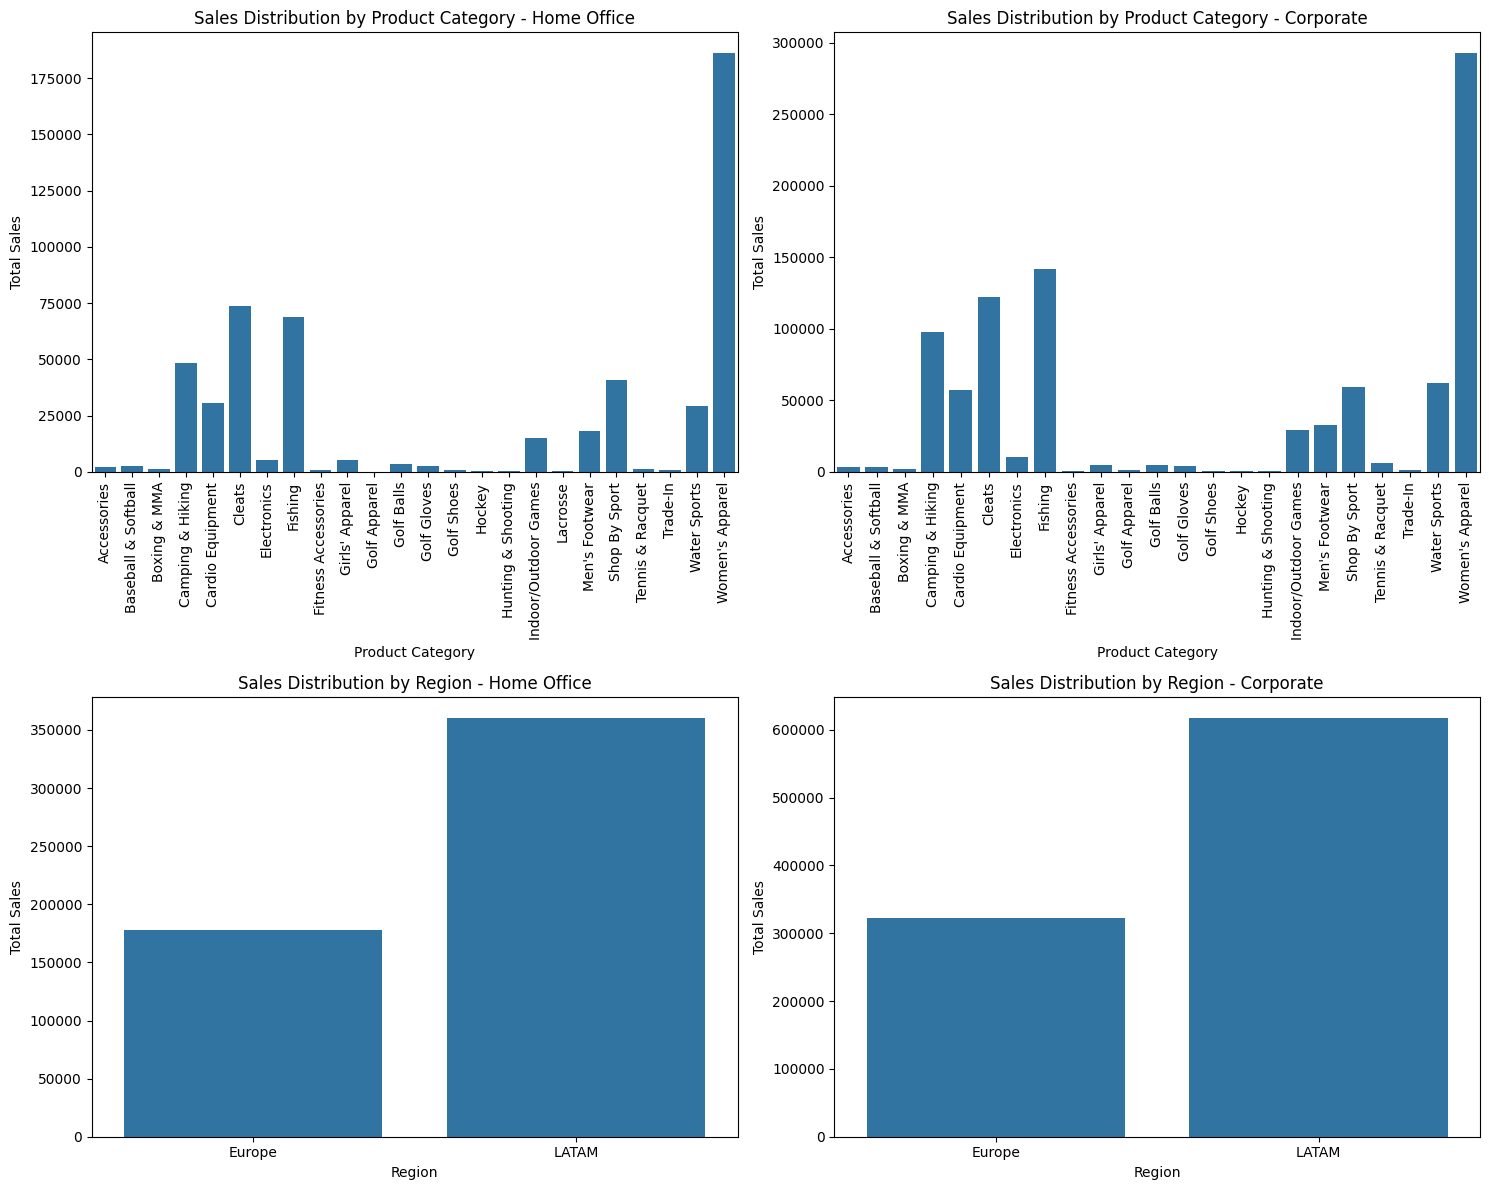

In [9]:
q2_data3 = df_home_office[(df_home_office['OrderDate'] >= '2015-04-01') & (df['OrderDate'] < '2015-07-01')]
q2_data2 = df_corporate[(df_corporate['OrderDate'] >= '2015-04-01') & (df['OrderDate'] < '2015-07-01')]
sales_by_product_segment1 = q2_data3.groupby('Category_Name')['Sales'].sum().reset_index()
sales_by_product_segment2 = q2_data2.groupby('Category_Name')['Sales'].sum().reset_index()

sales_by_region_segment1 = q2_data3.groupby('Market')['Sales'].sum().reset_index()
sales_by_region_segment2 = q2_data2.groupby('Market')['Sales'].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='Category_Name', y='Sales', data=sales_by_product_segment1, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution by Product Category - Home Office')
axes[0, 0].set_xlabel('Product Category')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x='Category_Name', y='Sales', data=sales_by_product_segment2, ax=axes[0, 1])
axes[0, 1].set_title('Sales Distribution by Product Category - Corporate')
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x='Market', y='Sales', data=sales_by_region_segment1, ax=axes[1, 0])
axes[1, 0].set_title('Sales Distribution by Region - Home Office')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Total Sales')

sns.barplot(x='Market', y='Sales', data=sales_by_region_segment2, ax=axes[1, 1])
axes[1, 1].set_title('Sales Distribution by Region - Corporate')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Total Sales')

plt.tight_layout()

plt.show()

In [10]:
df_2 = pd.read_csv("/Users/branly/PA.csv")

df_2.head()

filtered_df2 = df_2[df_2['Product_Name'] == "Titleist Pro V1 High Numbers Personalized Gol"]
filtered_df2.head()

,Product_Name,Category_Name,total_sales,average_sales,number_of_orders
99,Titleist Pro V1 High Numbers Personalized Gol,Electronics,1.333045e+06,178.143142,7483


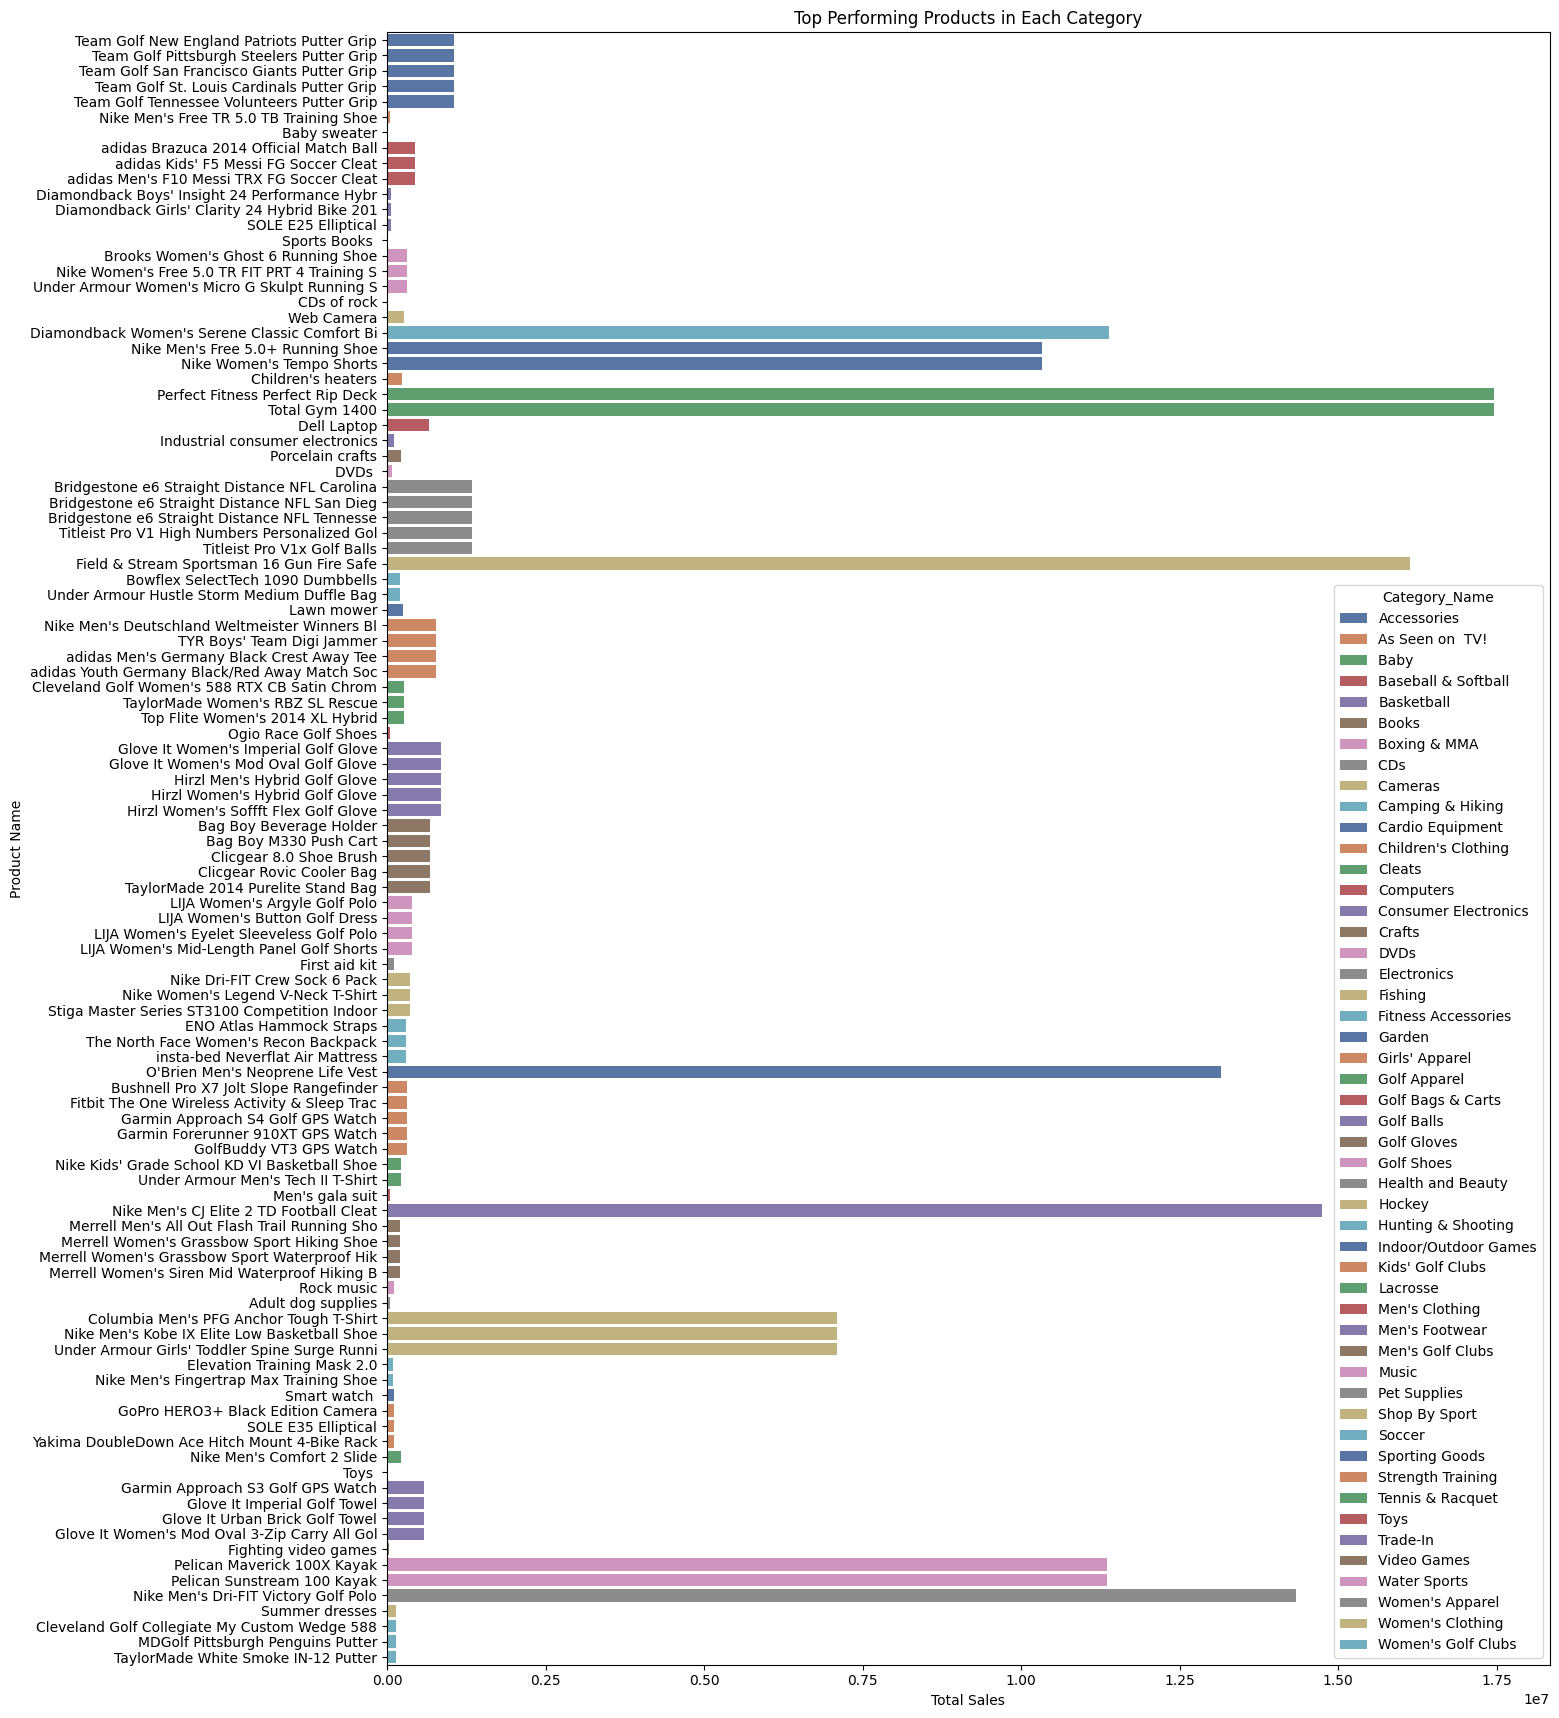

In [11]:
product_performance = df_2.groupby(['Category_Name', 'Product_Name']).agg({'total_sales': 'sum', 'average_sales': 'mean', 'number_of_orders': 'count'}).reset_index()

top_products = product_performance.sort_values(by=['Category_Name', 'total_sales'], ascending=[True, False]).groupby('Category_Name').head(5)

fig, ax = plt.subplots(figsize=(15, len(top_products) * 0.2))
sns.barplot(x='total_sales', y='Product_Name', hue='Category_Name', data=top_products,  ax=ax, palette='deep')
plt.title('Top Performing Products in Each Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


In [12]:
df4 = pd.read_csv("/Users/branly/Desktop/Python Project/MarketTrends.csv")

aggregate_4 = {
    'Market':'last',
    'Product_Name':'last',
    'OrderDate':'last',
    'OrderDate': 'last',
    
}

df_mt= df4.groupby('column1').agg(aggregate_4).reset_index()

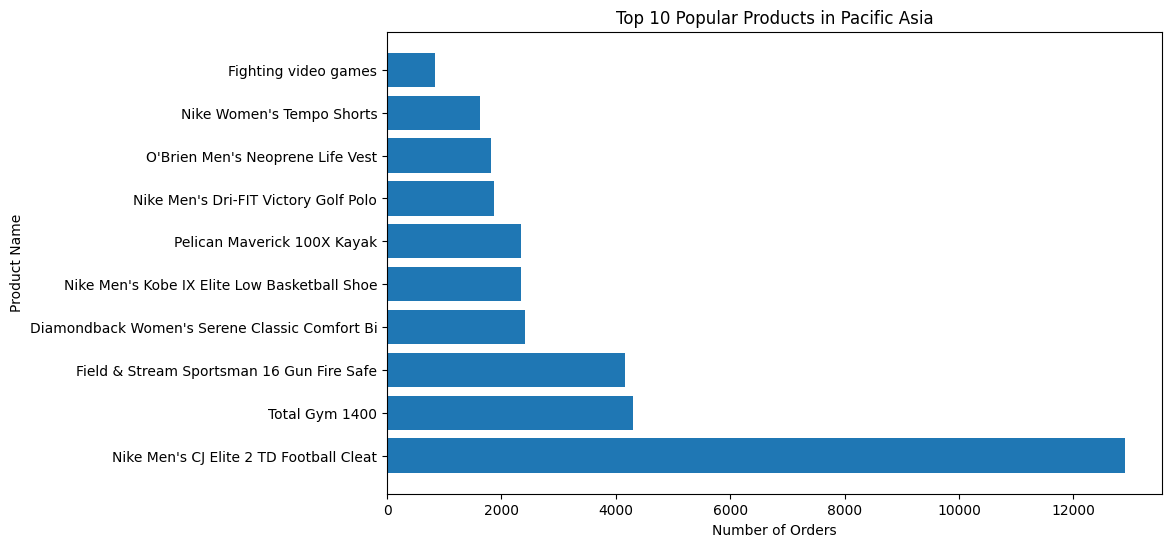

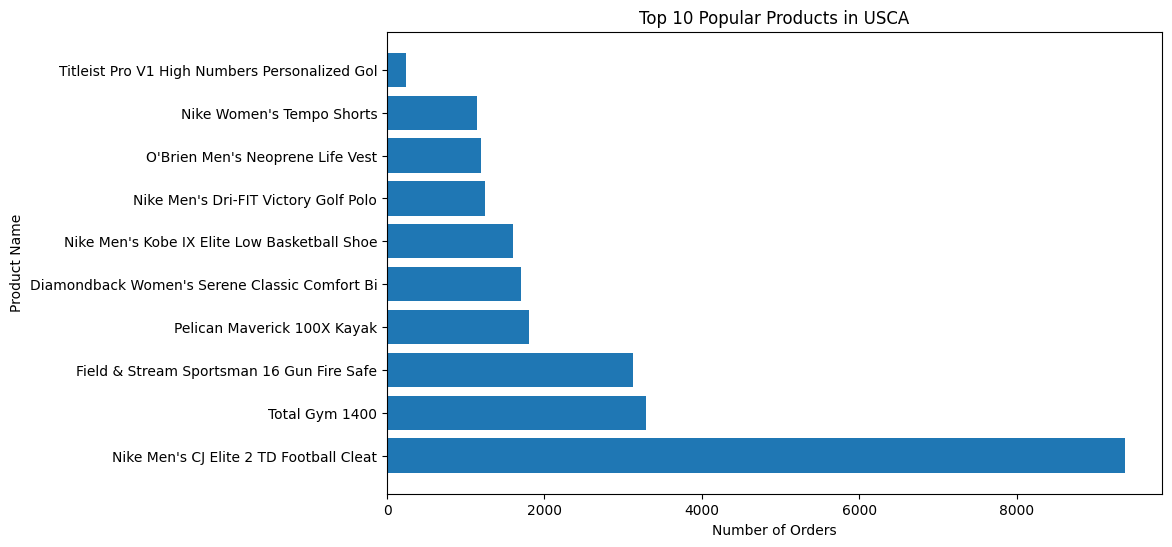

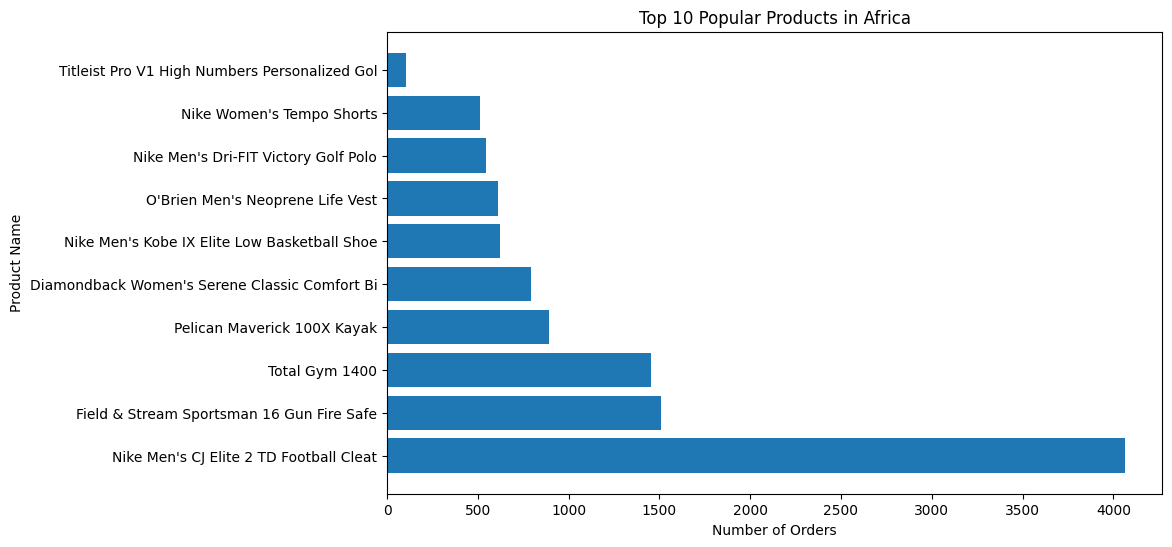

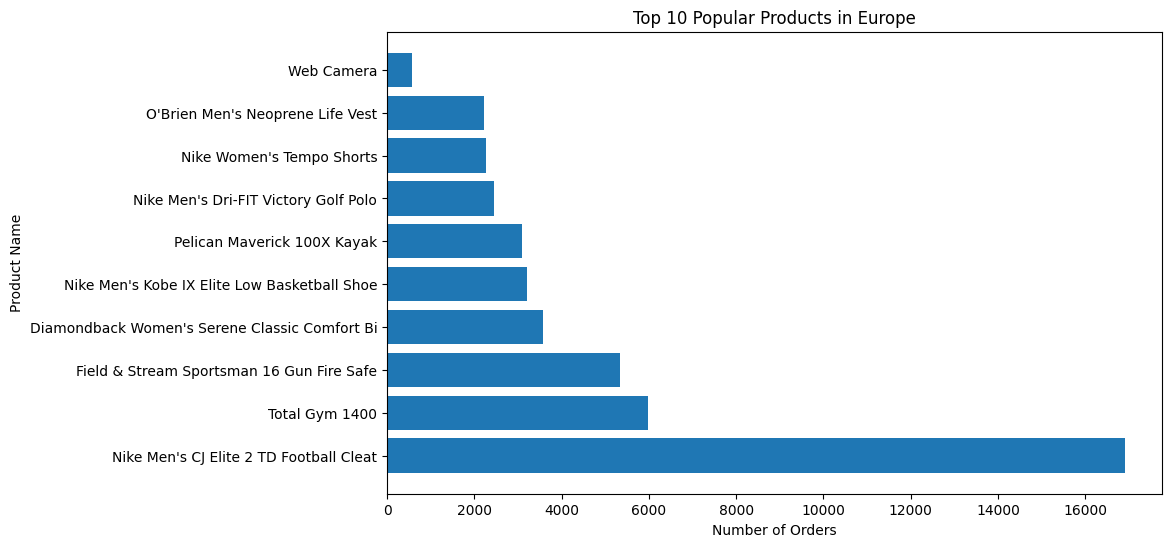

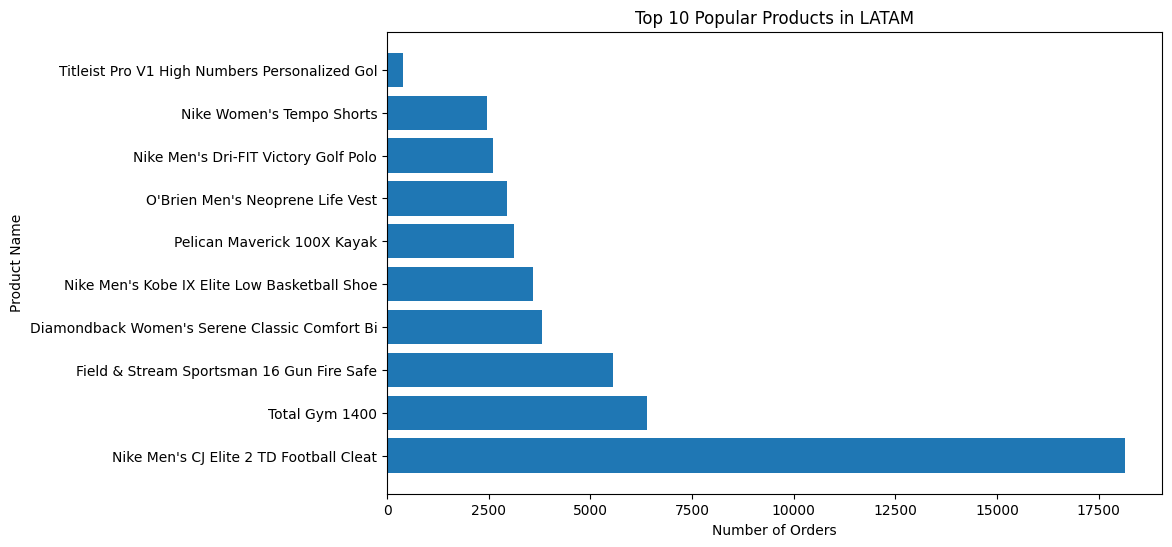

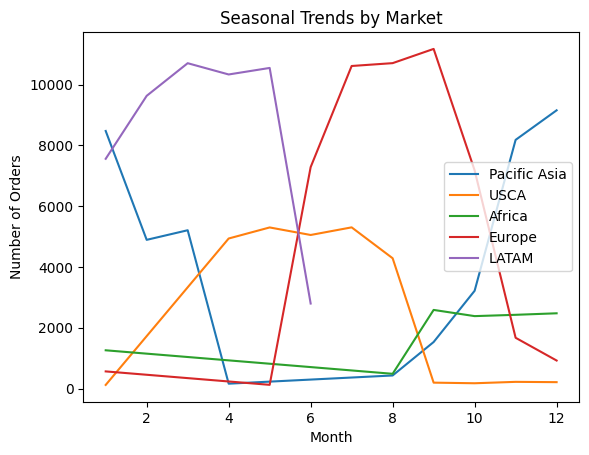

In [13]:
df_mt['OrderDate'] = pd.to_datetime(df_mt['OrderDate'])
popular_products_by_market = df_mt.groupby(['Market', 'Product_Name']).size().sort_values(ascending=False).reset_index(name='count')

for market in df_mt['Market'].unique():
    plt.figure(figsize=(10,6))
    market_data = popular_products_by_market[popular_products_by_market['Market'] == market]
    # Selecting top N products for clarity in visualization
    top_n = market_data.head(10)
    plt.barh(top_n['Product_Name'], top_n['count'])
    plt.xlabel('Number of Orders')
    plt.ylabel('Product Name')
    plt.title(f'Top 10 Popular Products in {market}')
    plt.show()


df_mt['month'] = df_mt['OrderDate'].dt.month


seasonal_trends = df_mt.groupby(['Market', 'month']).size().reset_index(name='count')


for market in df_mt['Market'].unique():
    market_data = seasonal_trends[seasonal_trends['Market'] == market]
    plt.plot(market_data['month'], market_data['count'], label=market)

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Seasonal Trends by Market')
plt.legend()
plt.show()

In [14]:
df7 = pd.read_csv("/Users/branly/Desktop/Python Project/PPO2.csv")

aggregate_5 = {
    'Order_Profit_Per_Order': 'last',
    'Product_Name':'last',
    'Order_Item_Product_Price':'last',
    'OrderDate': 'last',
    'Sales':'last'
    
    


}


df_p = df7.groupby('column1').agg(aggregate_5).reset_index()

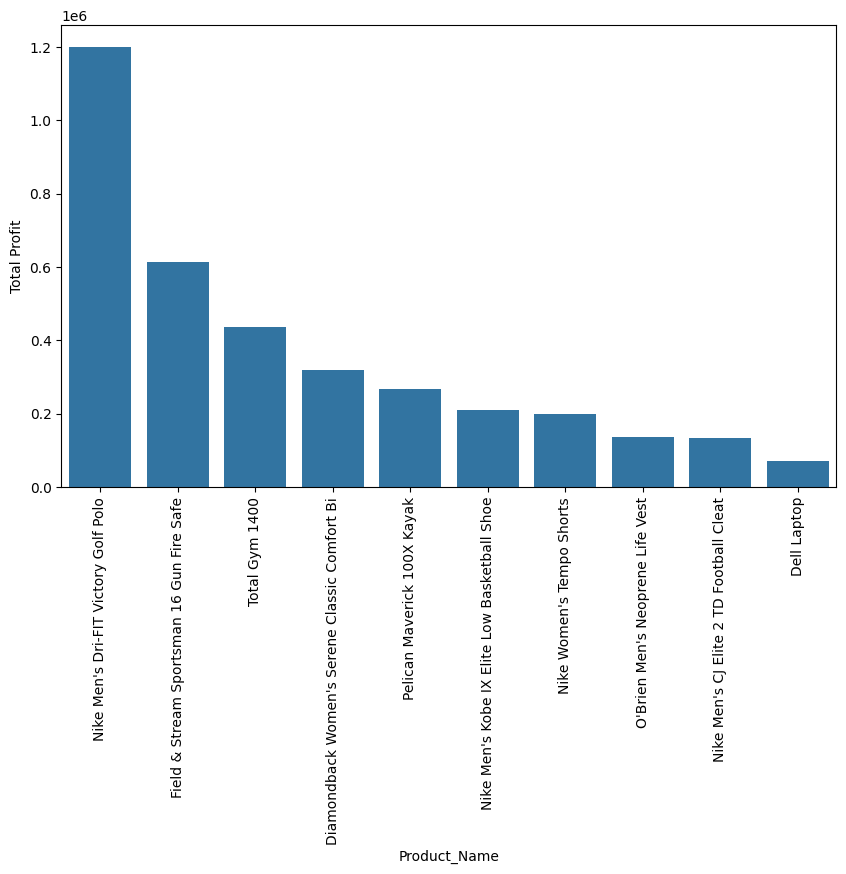

In [15]:
profit_per_product = df_p.groupby('Product_Name')['Order_Profit_Per_Order'].sum()


profit_per_product = profit_per_product.sort_values(ascending=False)


df_p['profit_margin'] = (df_p['Order_Profit_Per_Order'] - df_p['Order_Item_Product_Price']) / df_p['Order_Item_Product_Price']


profit_margin_per_product = df_p.groupby('Product_Name')['profit_margin'].mean()


profit_margin_per_product = profit_margin_per_product.sort_values(ascending=False)

combined_data = pd.DataFrame({
    'Total Profit': profit_per_product,
    'Average Profit Margin': profit_margin_per_product
})


combined_data = combined_data.sort_values(by='Total Profit', ascending=False)

top_n = combined_data.head(10)  

plt.figure(figsize=(10, 6)) 
sns.barplot(x=top_n.index, y='Total Profit', data=top_n)
plt.xticks(rotation=90)  
plt.show()




In [16]:
product_of_interest = "Nike Men's Dri-FIT Victory Golf Polo"


product_data_p = df_p[df_p['Product_Name'] == product_of_interest]


total_profit_1 = product_data_p['Order_Profit_Per_Order'].sum()

print(f"Total Profit for {product_of_interest}: {total_profit_1}")

Total Profit for Nike Men's Dri-FIT Victory Golf Polo: 1200564.340063049


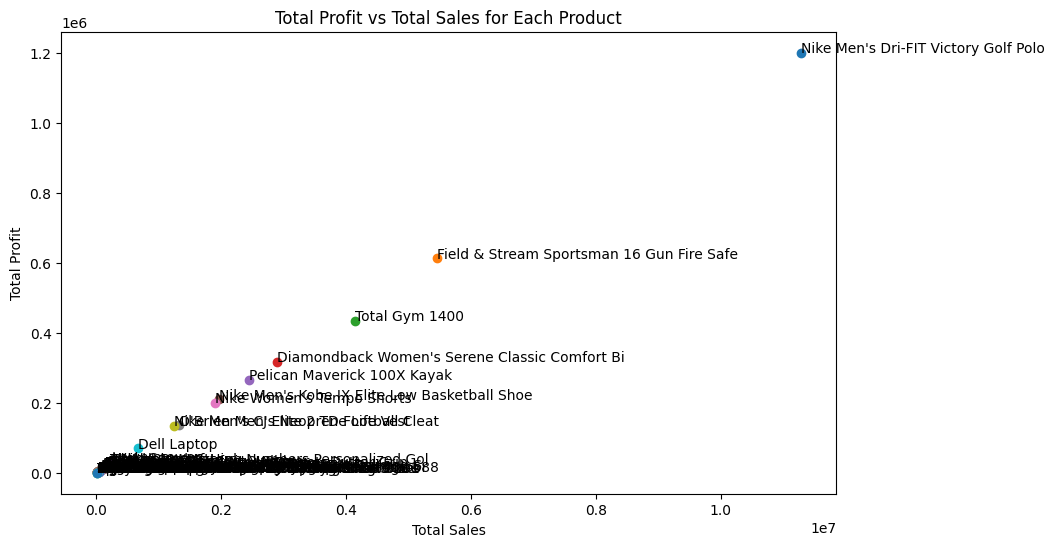

In [17]:
grouped_data = df_p.groupby('Product_Name').agg({'Order_Profit_Per_Order': 'sum', 'Sales': 'sum'}).reset_index()
sorted_data = grouped_data.sort_values(by=['Order_Profit_Per_Order', 'Sales'], ascending=[False, True])

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(sorted_data)):
    ax.scatter(sorted_data['Sales'].iloc[i], sorted_data['Order_Profit_Per_Order'].iloc[i])
    ax.text(sorted_data['Sales'].iloc[i], sorted_data['Order_Profit_Per_Order'].iloc[i], sorted_data['Product_Name'].iloc[i])


ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Profit')
ax.set_title('Total Profit vs Total Sales for Each Product')


plt.show()

In [35]:
df8 = pd.read_csv("/Users/branly/Desktop/Python Project/OrderSS.csv")

aggregate_6 = {
    'Order_Profit_Per_Order': 'last',
    'Product_Name':'last',
    'Order_Item_Product_Price':'last',
    'OrderDate': 'last',
    'Order_Status':'last',
    'Order_Country':'last',
    'Late_delivery_risk':'last',
    'Category_Name':'last',
    
    


}


df_os = df8.groupby('column1').agg(aggregate_6).reset_index()

df_os.head()

,column1,Order_Profit_Per_Order,Product_Name,Order_Item_Product_Price,OrderDate,Order_Status,Order_Country,Late_delivery_risk,Category_Name
0,0,91.250000,Smart watch,327.75,2018-01-31 22:56:00.0000000,COMPLETE,Indonesia,0,Sporting Goods
1,1,-249.089996,Smart watch,327.75,2018-01-13 12:27:00.0000000,PENDING,India,1,Sporting Goods
2,2,-247.779999,Smart watch,327.75,2018-01-13 12:06:00.0000000,CLOSED,India,0,Sporting Goods
3,3,22.860001,Smart watch,327.75,2018-01-13 11:45:00.0000000,COMPLETE,Australia,0,Sporting Goods
4,4,134.210007,Smart watch,327.75,2018-01-13 11:24:00.0000000,PENDING_PAYMENT,Australia,0,Sporting Goods


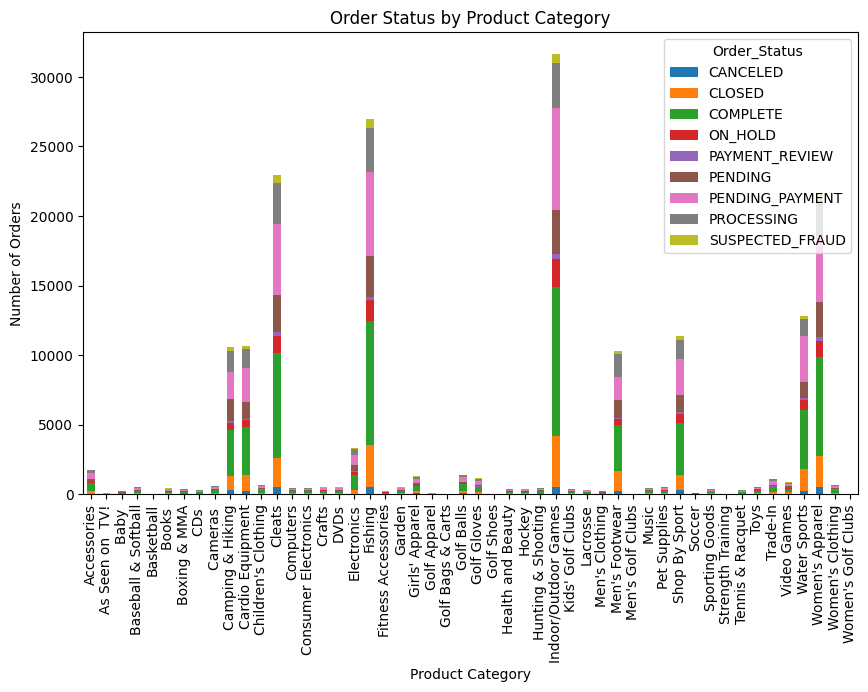

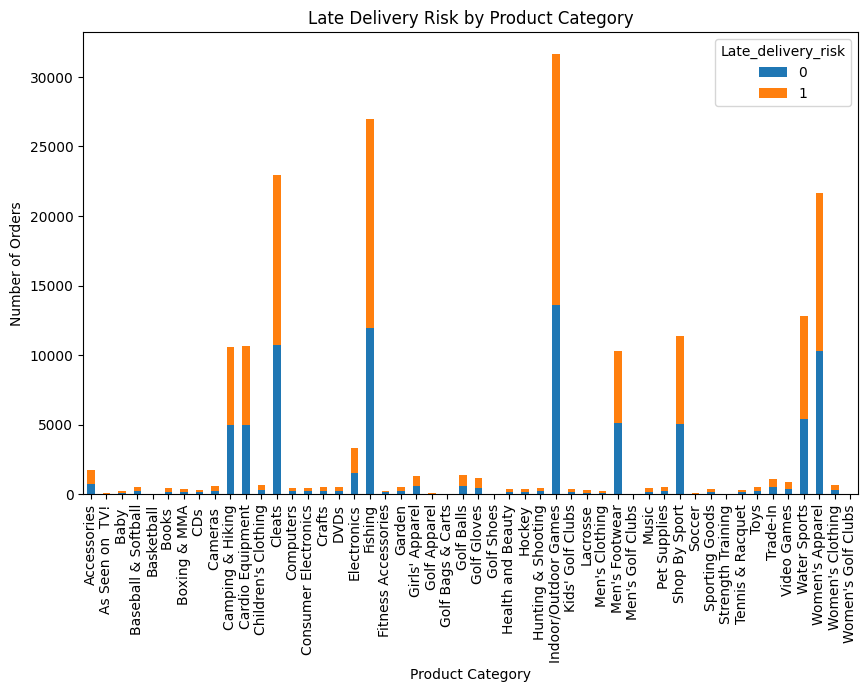

KeyError: 'Market'

In [33]:
status_counts = df_os.groupby(['Category_Name', 'Order_Status'])['Order_Status'].count().unstack()
status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Order Status by Product Category')
plt.ylabel('Number of Orders')
plt.xlabel('Product Category')
plt.show()

late_delivery = df_os.groupby(['Category_Name', 'Late_delivery_risk'])['Late_delivery_risk'].count().unstack()
late_delivery.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Late Delivery Risk by Product Category')
plt.ylabel('Number of Orders')
plt.xlabel('Product Category')
plt.show()

region_late_delivery = df_os.groupby(['Market', 'Late_delivery_risk'])['Late_delivery_risk'].count().unstack()
region_late_delivery.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Late Delivery Risk by Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.show()


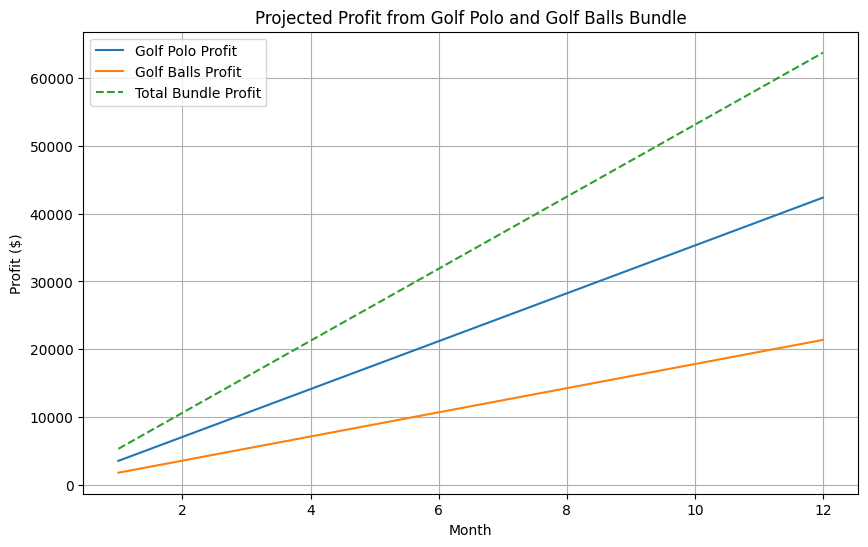

In [32]:
golf_polo_sales = 185.801394  
golf_polo_profit_per_unit = 19 


golf_balls_sales =  178.143142
golf_balls_profit_per_unit = 10 


months = np.arange(1, 13)  
golf_polo_profit = months * golf_polo_sales * golf_polo_profit_per_unit
golf_balls_profit = months * golf_balls_sales * golf_balls_profit_per_unit
total_profit = golf_polo_profit + golf_balls_profit


plt.figure(figsize=(10, 6))
plt.plot(months, golf_polo_profit, label='Golf Polo Profit')
plt.plot(months, golf_balls_profit, label='Golf Balls Profit')
plt.plot(months, total_profit, label='Total Bundle Profit', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.title('Projected Profit from Golf Polo and Golf Balls Bundle')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
df9 = pd.read_csv("/Users/branly/Desktop/Python Project/Late.csv")

aggregate_7 = {
    'Market':'last',
    'Order_Country':'last',
    'OrderDate':'last',
    'Late_delivery_risk':'last',
    'Department_Name':'last',
    'Category_Name':'last'
    
    


}


df_late = df9.groupby('column1').agg(aggregate_7).reset_index()

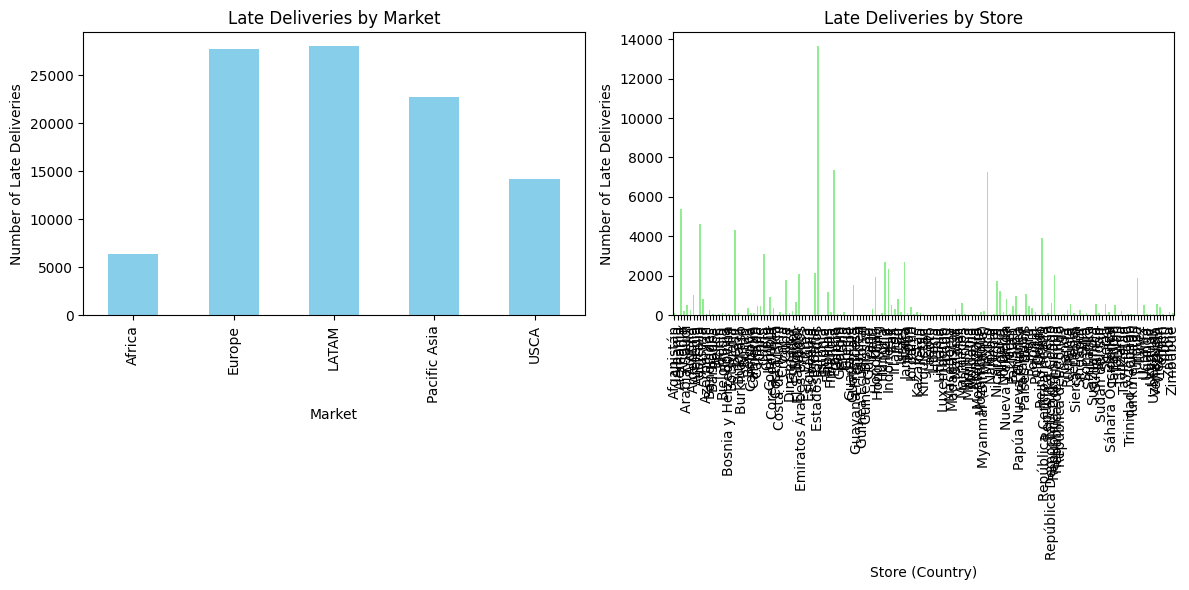

In [22]:
late_deliveries_by_market = df_late[df_late["Late_delivery_risk"] == 1].groupby("Market").size()


late_deliveries_by_store = df_late[df_late["Late_delivery_risk"] == 1].groupby("Order_Country").size()

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
late_deliveries_by_market.plot(kind='bar', color='skyblue')
plt.title('Late Deliveries by Market')
plt.xlabel('Market')
plt.ylabel('Number of Late Deliveries')

plt.subplot(1, 2, 2)
late_deliveries_by_store.plot(kind='bar', color='lightgreen')
plt.title('Late Deliveries by Store')
plt.xlabel('Store (Country)')
plt.ylabel('Number of Late Deliveries')

plt.tight_layout()
plt.show()

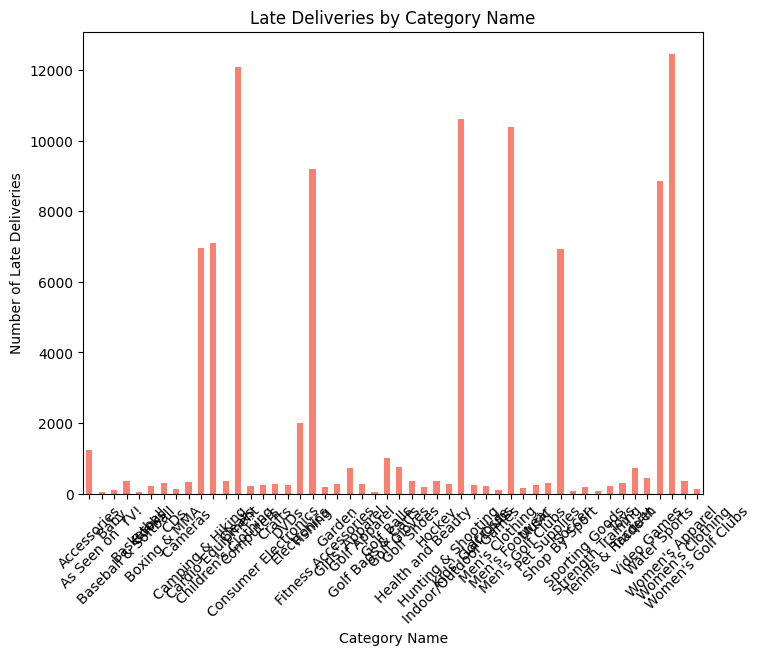

In [23]:
late_deliveries_by_category = df_late[df_late["Late_delivery_risk"] == 1].groupby("Category_Name").size()

# Plotting the results
plt.figure(figsize=(8, 6))
late_deliveries_by_category.plot(kind='bar', color='salmon')
plt.title('Late Deliveries by Category Name')
plt.xlabel('Category Name')
plt.ylabel('Number of Late Deliveries')
plt.xticks(rotation=45)
plt.show()

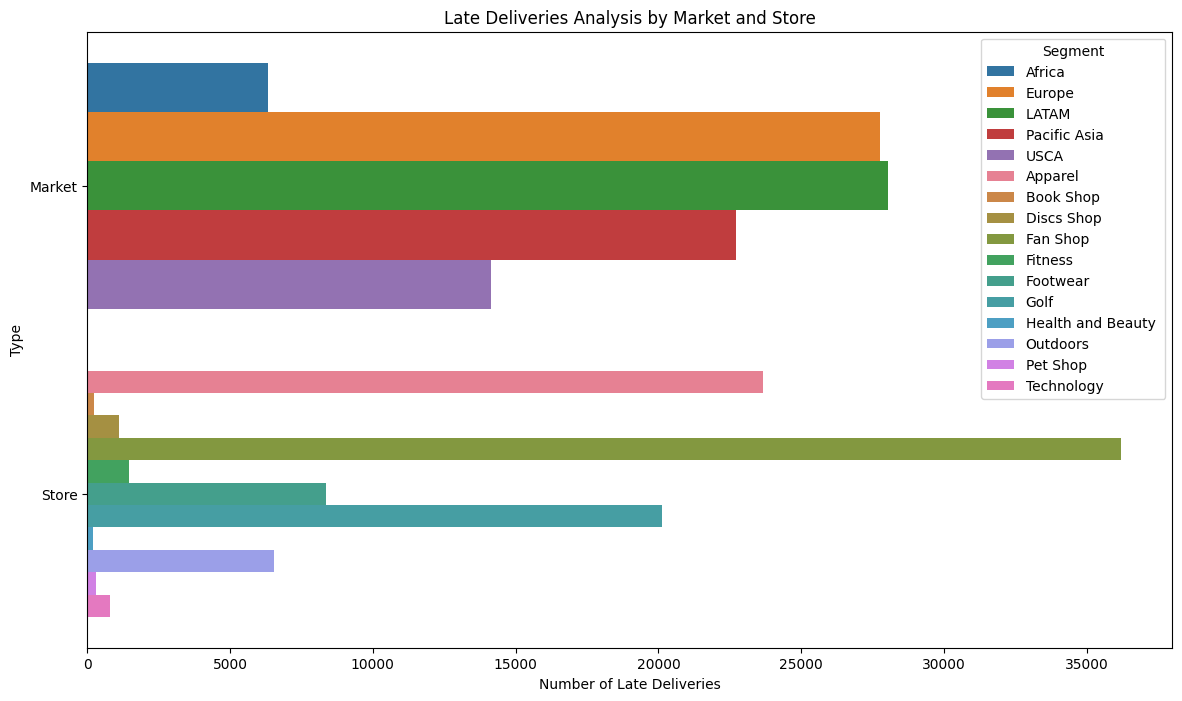

In [24]:
market_late_deliveries = df_late[df_late["Late_delivery_risk"] == 1].groupby('Market').size()
store_late_deliveries = df_late[df_late["Late_delivery_risk"] == 1].groupby('Department_Name').size()
category_late_deliveries = df_late[df_late["Late_delivery_risk"] == 1].groupby('Category_Name').size()


combined_data = {
    'Market': market_late_deliveries.index.tolist() + ['']*len(store_late_deliveries) + ['']*len(category_late_deliveries),
    'Store': ['']*len(market_late_deliveries) + store_late_deliveries.index.tolist() + ['']*len(category_late_deliveries),
    'Category': ['']*len(market_late_deliveries) + ['']*len(store_late_deliveries) + category_late_deliveries.index.tolist(),
    'Late Deliveries': market_late_deliveries.tolist() + store_late_deliveries.tolist() + category_late_deliveries.tolist(),
    'Type': ['Market']*len(market_late_deliveries) + ['Store']*len(store_late_deliveries) + ['Category']*len(category_late_deliveries)
}
combined_df = pd.DataFrame(combined_data)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Late Deliveries', y='Type', hue='Market', data=combined_df[combined_df['Type'] == 'Market'])
sns.barplot(x='Late Deliveries', y='Type', hue='Store', data=combined_df[combined_df['Type'] == 'Store'])
#sns.barplot(x='Late Deliveries', y='Type', hue='Category', data=combined_df[combined_df['Type'] == 'Category'])
plt.title('Late Deliveries Analysis by Market and Store')
plt.xlabel('Number of Late Deliveries')
plt.ylabel('Type')
plt.legend(title='Segment', loc='upper right')
plt.show()

In [25]:
df10 = pd.read_csv("/Users/branly/Desktop/Python Project/3Late.csv")

aggregate_8 = {
    'Market':'last',
    'Order_Country':'last',
    'OrderDate':'last',
    'Late_delivery_risk':'last',
    'Department_Name':'last',
    'Category_Name':'last',
    'shipping_date_DateOrders':'last',
    'Shipping_Mode':'last'
    
    


}


df_2late = df10.groupby('column1').agg(aggregate_8).reset_index()

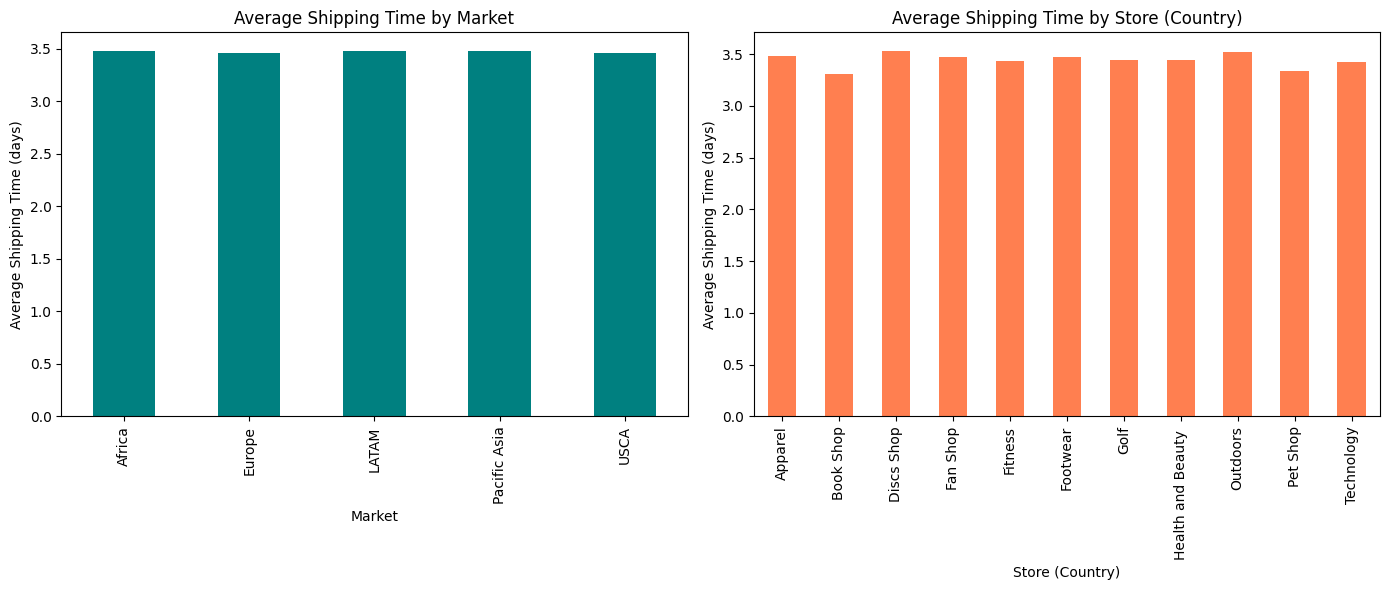

In [26]:
df_2late['OrderDate'] = pd.to_datetime(df_2late['OrderDate'])
df_2late['shipping_date_DateOrders'] = pd.to_datetime(df_2late['shipping_date_DateOrders'])


df_2late['Shipping_Time'] = (df_2late['shipping_date_DateOrders'] - df_2late['OrderDate']).dt.days


avg_shipping_time_market = df_2late.groupby('Market')['Shipping_Time'].mean()
avg_shipping_time_store = df_2late.groupby('Department_Name')['Shipping_Time'].mean()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
avg_shipping_time_market.plot(kind='bar', color='teal')
plt.title('Average Shipping Time by Market')
plt.xlabel('Market')
plt.ylabel('Average Shipping Time (days)')

plt.subplot(1, 2, 2)
avg_shipping_time_store.plot(kind='bar', color='coral')
plt.title('Average Shipping Time by Store (Country)')
plt.xlabel('Store (Country)')
plt.ylabel('Average Shipping Time (days)')

plt.tight_layout()
plt.show()

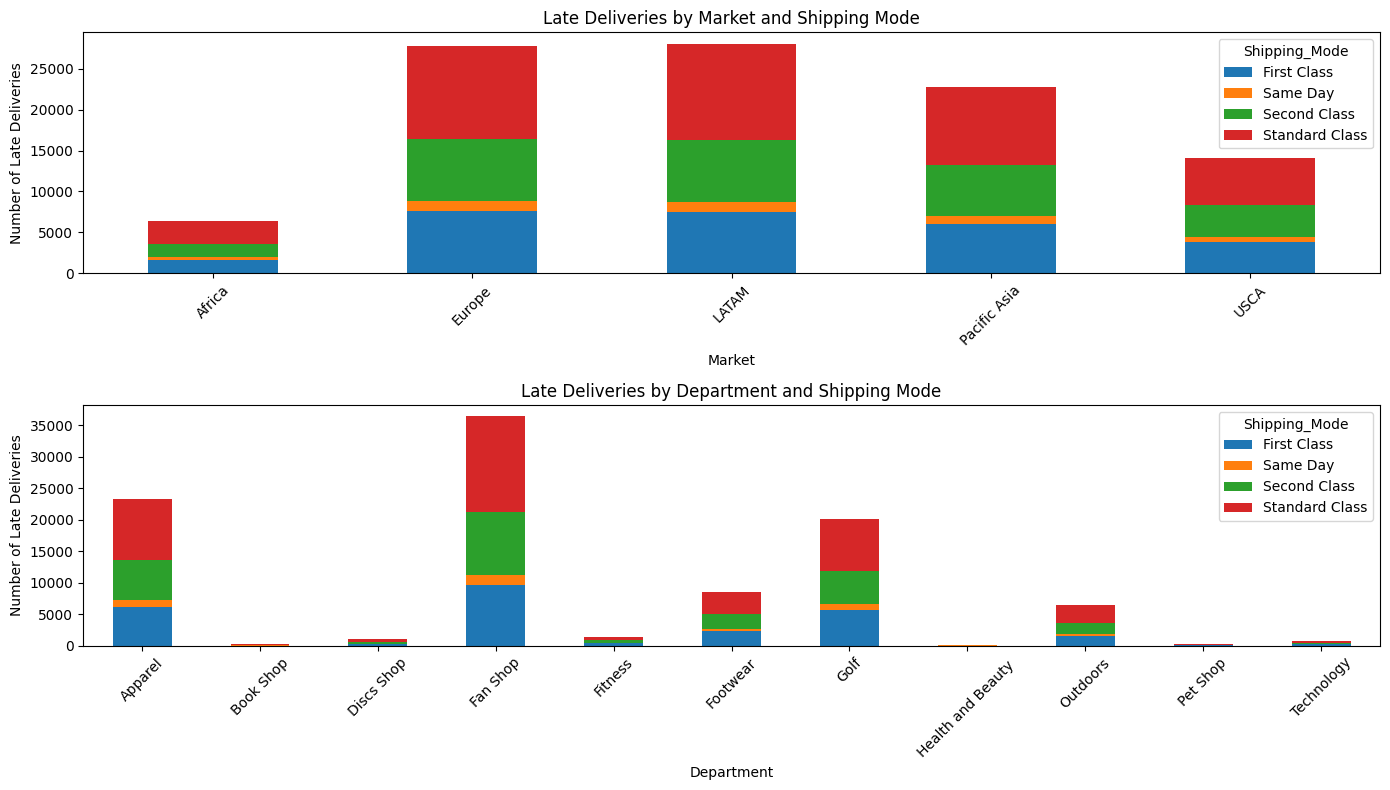

In [27]:

late_deliveries = df_2late[df_2late["Late_delivery_risk"] == 1]


late_deliveries_by_market_shipping_mode = late_deliveries.groupby(['Market', 'Shipping_Mode']).size().unstack(fill_value=0)


late_deliveries_by_department_shipping_mode = late_deliveries.groupby(['Department_Name', 'Shipping_Mode']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
late_deliveries_by_market_shipping_mode.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Late Deliveries by Market and Shipping Mode')
plt.xlabel('Market')
plt.ylabel('Number of Late Deliveries')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
late_deliveries_by_department_shipping_mode.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Late Deliveries by Department and Shipping Mode')
plt.xlabel('Department')
plt.ylabel('Number of Late Deliveries')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


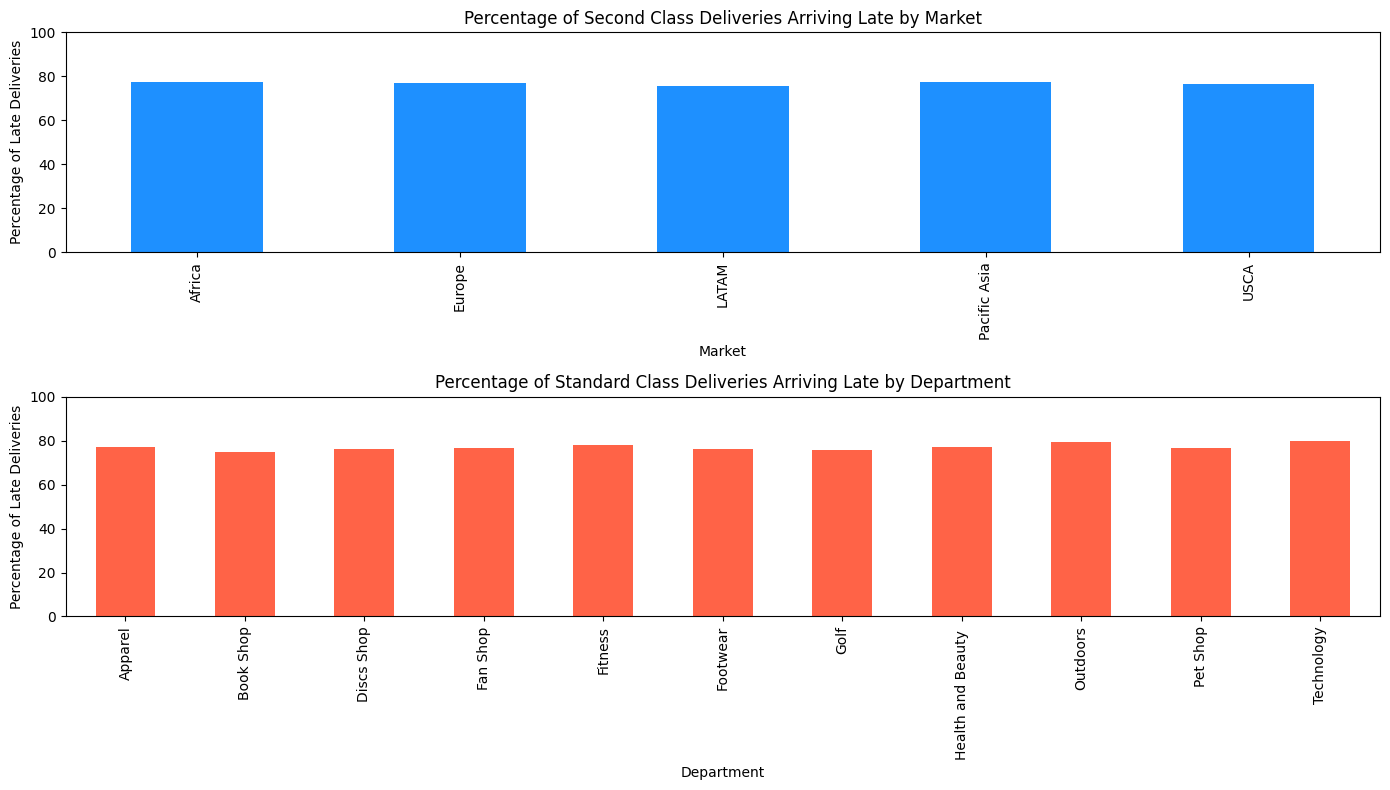

In [28]:
standard_deliveries = df_2late[df_2late["Shipping_Mode"] == "Second Class"]


total_standard_market = standard_deliveries.groupby('Market').size()
late_standard_market = standard_deliveries[standard_deliveries["Late_delivery_risk"] == 1].groupby('Market').size()
late_percentage_market = (late_standard_market / total_standard_market * 100).fillna(0)


total_standard_department = standard_deliveries.groupby('Department_Name').size()
late_standard_department = standard_deliveries[standard_deliveries["Late_delivery_risk"] == 1].groupby('Department_Name').size()
late_percentage_department = (late_standard_department / total_standard_department * 100).fillna(0)


plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
late_percentage_market.plot(kind='bar', color='dodgerblue')
plt.title('Percentage of Second Class Deliveries Arriving Late by Market')
plt.xlabel('Market')
plt.ylabel('Percentage of Late Deliveries')
plt.ylim(0, 100)

plt.subplot(2, 1, 2)
late_percentage_department.plot(kind='bar', color='tomato')
plt.title('Percentage of Standard Class Deliveries Arriving Late by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Late Deliveries')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

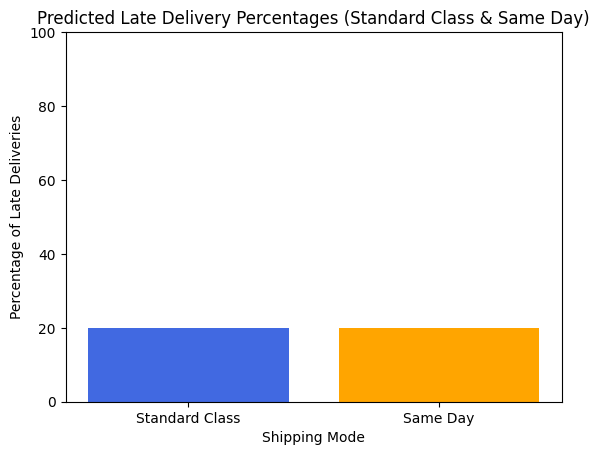

In [29]:

current_late_percentages = {
    'Second Class': 80,
    'Standard Class': 40,
    'First Class': 90,
    'Same Day': 40
}


total_deliveries = 100  
deliveries_per_mode = {
    'Second Class': total_deliveries * 0.25,
    'Standard Class': total_deliveries * 0.25,
    'First Class': total_deliveries * 0.25,
    'Same Day': total_deliveries * 0.25
}


new_deliveries_per_mode = {
    'Standard Class': deliveries_per_mode['Standard Class'] + deliveries_per_mode['Second Class'] / 2 + deliveries_per_mode['First Class'] / 2,
    'Same Day': deliveries_per_mode['Same Day'] + deliveries_per_mode['Second Class'] / 2 + deliveries_per_mode['First Class'] / 2
}


expected_late_deliveries_new_strategy = {
    'Standard Class': new_deliveries_per_mode['Standard Class'] * current_late_percentages['Standard Class'] / 100,
    'Same Day': new_deliveries_per_mode['Same Day'] * current_late_percentages['Same Day'] / 100
}


total_deliveries_new_strategy = sum(new_deliveries_per_mode.values())
expected_late_percentage_new_strategy = {
    'Standard Class': expected_late_deliveries_new_strategy['Standard Class'] / total_deliveries_new_strategy * 100,
    'Same Day': expected_late_deliveries_new_strategy['Same Day'] / total_deliveries_new_strategy * 100
}


labels = expected_late_percentage_new_strategy.keys()
values = expected_late_percentage_new_strategy.values()

plt.bar(labels, values, color=['royalblue', 'orange'])
plt.title('Predicted Late Delivery Percentages (Standard Class & Same Day)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage of Late Deliveries')
plt.ylim(0, 100)
plt.show()

In [30]:

deliveries_by_shipping_mode = df_2late['Shipping_Mode'].value_counts()


print(deliveries_by_shipping_mode)


Shipping_Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64


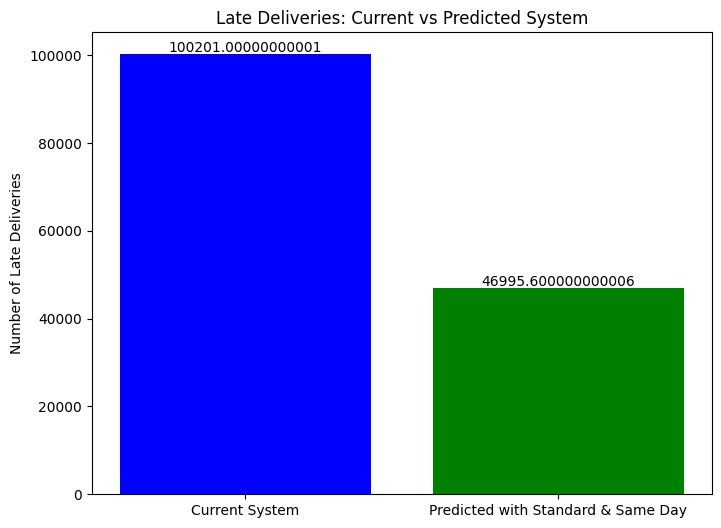

(100201.00000000001, 46995.600000000006)

In [31]:

current_late_percentages = {
    "Second Class": 80,
    "Standard Class": 40,
    "First Class": 90,
    "Same Day": 40
}


total_deliveries = {
    "Second Class": 35216,
    "Standard Class": 107752,
    "First Class": 27814,
    "Same Day": 9737
}


current_late_deliveries = {mode: total_deliveries[mode] * current_late_percentages[mode] / 100 for mode in current_late_percentages}


total_current_late_deliveries = sum(current_late_deliveries.values())


predicted_late_deliveries = {
    "Standard Class": total_deliveries["Standard Class"] * current_late_percentages["Standard Class"] / 100,
    "Same Day": total_deliveries["Same Day"] * current_late_percentages["Same Day"] / 100
}


total_predicted_late_deliveries = sum(predicted_late_deliveries.values())


labels = ['Current System', 'Predicted with Standard & Same Day']
late_deliveries_counts = [total_current_late_deliveries, total_predicted_late_deliveries]

plt.figure(figsize=(8, 6))
plt.bar(labels, late_deliveries_counts, color=['blue', 'green'])
plt.title('Late Deliveries: Current vs Predicted System')
plt.ylabel('Number of Late Deliveries')
for i, v in enumerate(late_deliveries_counts):
    plt.text(i, v + 500, str(v), ha='center')
plt.show()


(total_current_late_deliveries, total_predicted_late_deliveries)


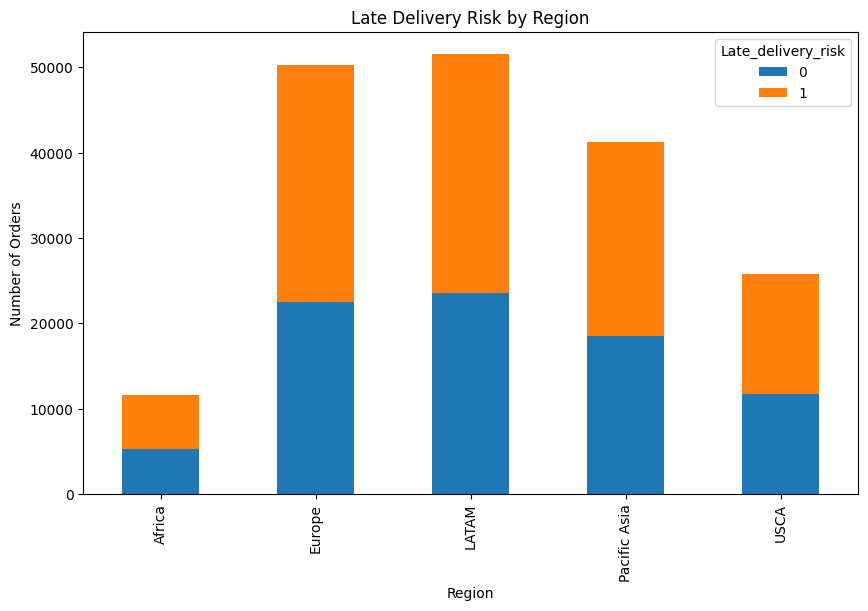

In [36]:
region_late_delivery = df_late.groupby(['Market', 'Late_delivery_risk'])['Late_delivery_risk'].count().unstack()
region_late_delivery.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Late Delivery Risk by Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.show()